# Company_Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Company=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/RANDOM FOREST/Company_Data.csv')

In [3]:
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
Company.duplicated().sum()

0

In [6]:
Company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [7]:
Company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [8]:
Company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='Density'>

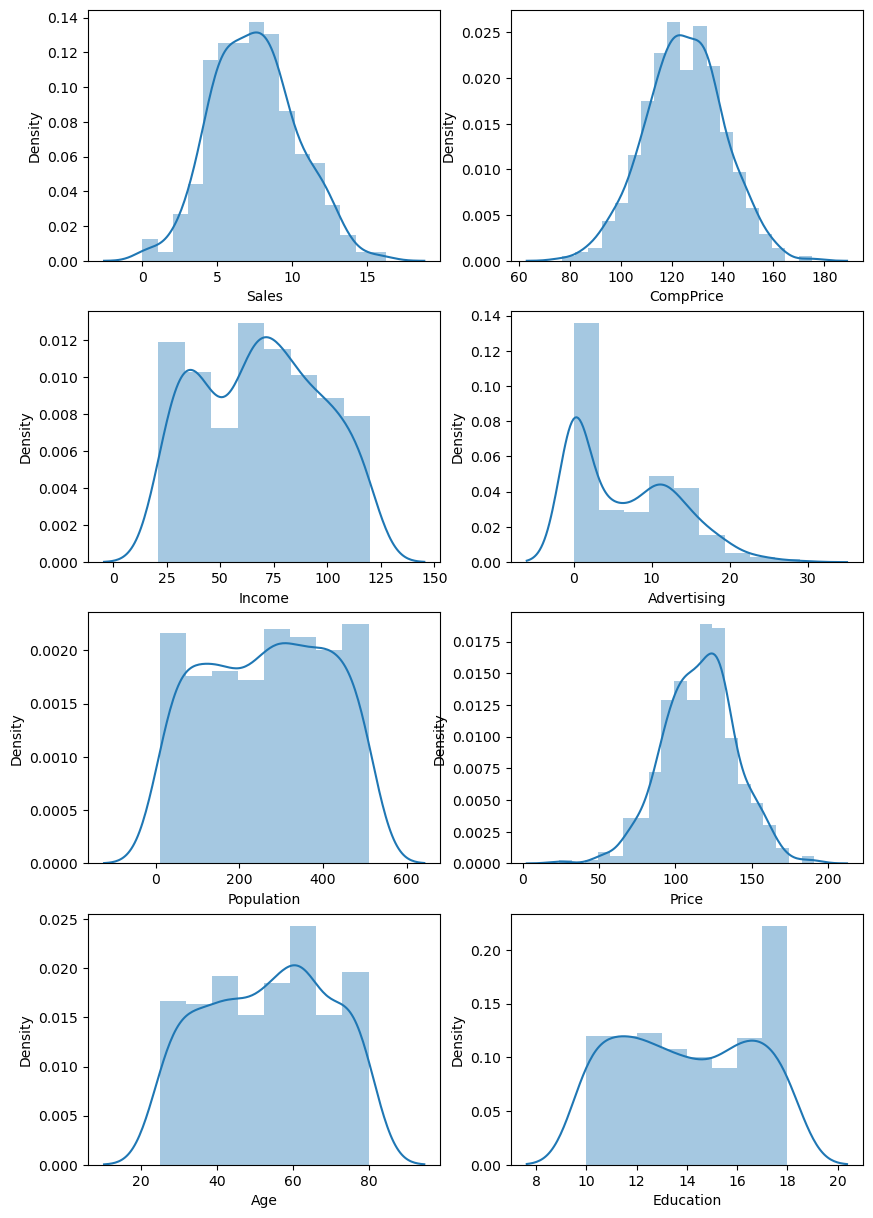

In [9]:
import seaborn as sns
fig,axs=plt.subplots(4,2,figsize=(10,15))
sns.distplot(Company['Sales'],ax=axs[0,0])
sns.distplot(Company['CompPrice'],ax=axs[0,1])
sns.distplot(Company['Income'],ax=axs[1,0])
sns.distplot(Company['Advertising'],ax=axs[1,1])
sns.distplot(Company['Population'],ax=axs[2,0])
sns.distplot(Company['Price'],ax=axs[2,1])
sns.distplot(Company['Age'],ax=axs[3,0])
sns.distplot(Company['Education'],ax=axs[3,1])

Text(0.5, 1.0, 'Education')

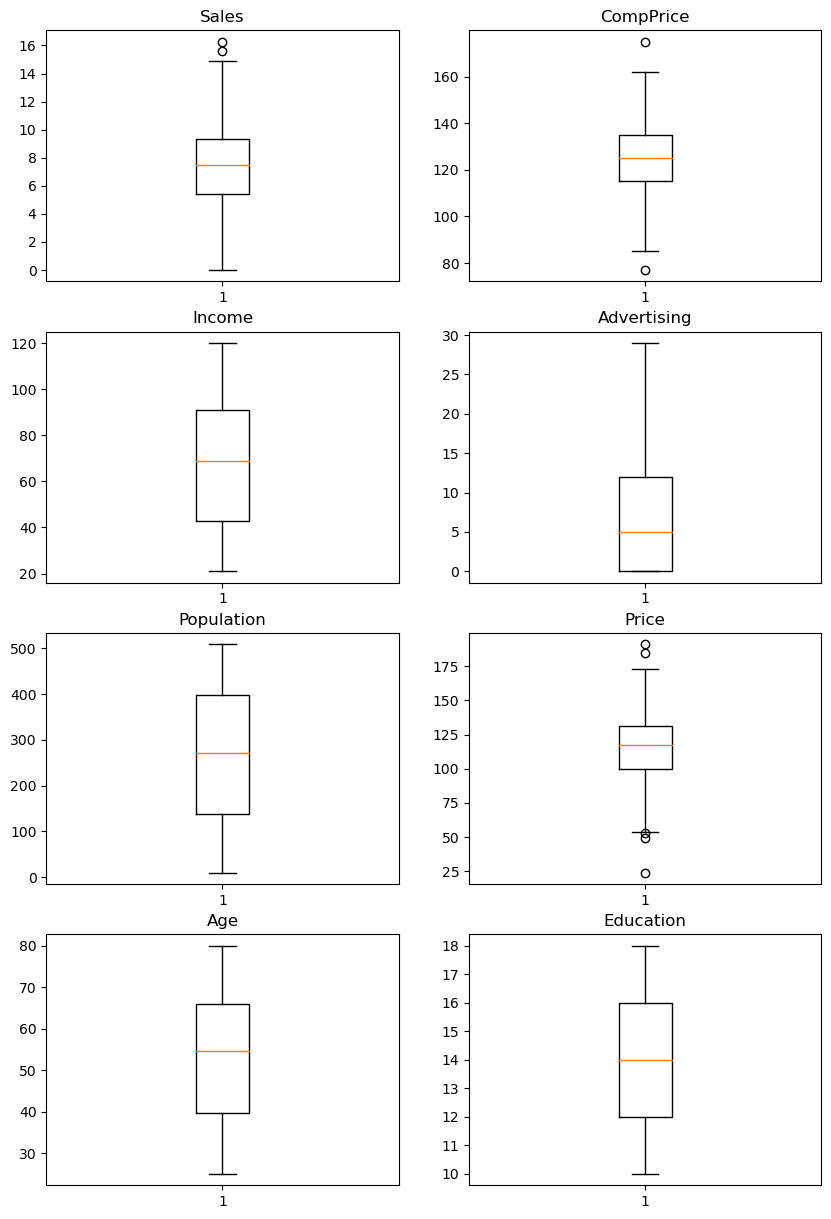

In [10]:
# PLOTTINFG THE BOX PLOTS FOR THE NUMERICAL FEATURES
fig,axs=plt.subplots(4,2,figsize=(10,15))
axs[0,0].boxplot(Company['Sales'])
axs[0,1].boxplot(Company['CompPrice'])
axs[1,0].boxplot(Company['Income'])
axs[1,1].boxplot(Company['Advertising'])
axs[2,0].boxplot(Company['Population'])
axs[2,1].boxplot(Company['Price'])
axs[3,0].boxplot(Company['Age'])
axs[3,1].boxplot(Company['Education'])
axs[0,0].set_title('Sales')
axs[0,1].set_title('CompPrice')
axs[1,0].set_title('Income')
axs[1,1].set_title('Advertising')
axs[2,0].set_title('Population')
axs[2,1].set_title('Price')
axs[3,0].set_title('Age')
axs[3,1].set_title('Education')

In [11]:
# Label Encoding for the categoricalcolumns
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
Company['ShelveLoc']=Encoder.fit_transform(Company['ShelveLoc'])
Company['Urban']=Encoder.fit_transform(Company['Urban'])
Company['US']=Encoder.fit_transform(Company['US'])

In [12]:
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [13]:
Company['ShelveLoc'].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [14]:
Company['Urban'].value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [15]:
Company['US'].value_counts()

1    258
0    142
Name: US, dtype: int64

## Converting Sales column into categorical

In [16]:
df=pd.Series(Company['Sales'])
S=[]
for i in df:
        if i>9:
            S.append('Good')
        else:
            S.append('Bad')
            
print(S)

['Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad'

In [17]:
df1=pd.DataFrame(S)
Company_data=pd.concat([df1,Company],axis=1)
Company_data=Company_data.rename({0:'Sales O/P'},axis=1)
Company_data

,Sales O/P,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Good,9.50,138,73,11,276,120,0,42,17,1,1
1,Good,11.22,111,48,16,260,83,1,65,10,1,1
2,Good,10.06,113,35,10,269,80,2,59,12,1,1
3,Bad,7.40,117,100,4,466,97,2,55,14,1,1
4,Bad,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,Good,12.57,138,108,17,203,128,1,33,14,1,1
396,Bad,6.14,139,23,3,37,120,2,55,11,0,1
397,Bad,7.41,162,26,12,368,159,2,40,18,1,1
398,Bad,5.94,100,79,7,284,95,0,50,12,1,1


In [18]:
Company_data['Sales O/P'].value_counts()

Bad     287
Good    113
Name: Sales O/P, dtype: int64

In [19]:
#SPLITTING THE DATA
X=Company_data.iloc[:,2:]
Y=Company_data.iloc[:,0]

In [20]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [21]:
Y

0      Good
1      Good
2      Good
3       Bad
4       Bad
       ... 
395    Good
396     Bad
397     Bad
398     Bad
399    Good
Name: Sales O/P, Length: 400, dtype: object

In [22]:
#Label Encoding the Y(Sales O/P)
Y=Encoder.fit_transform(Y)

In [23]:
Y

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [24]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees=100
max_features=5
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
Model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features,criterion='entropy')
results=cross_val_score(Model,X,Y,cv=kfold)

In [25]:
results

array([0.8  , 0.825, 0.975, 0.925, 0.85 , 0.825, 0.775, 0.9  , 0.875,
       0.85 ])

In [26]:
print(results.mean())

0.86


# 2) Fraud_check

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
Fraud=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/RANDOM FOREST/Fraud_check.csv')

In [29]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [30]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

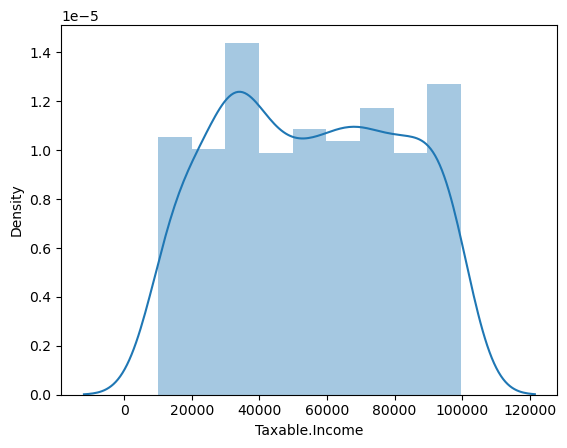

In [31]:
import seaborn as sns
sns.distplot(Fraud['Taxable.Income'])

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

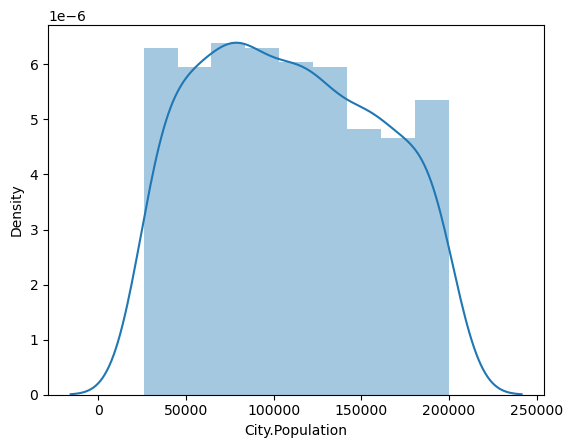

In [32]:
sns.distplot(Fraud['City.Population']) 

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

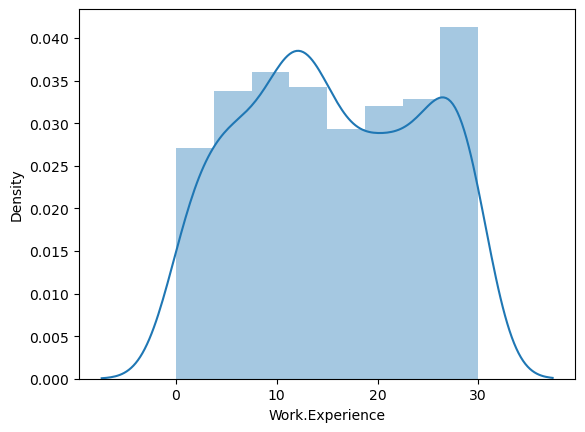

In [33]:
sns.distplot(Fraud['Work.Experience'])

Text(0.5, 1.0, 'Taxable.Income')

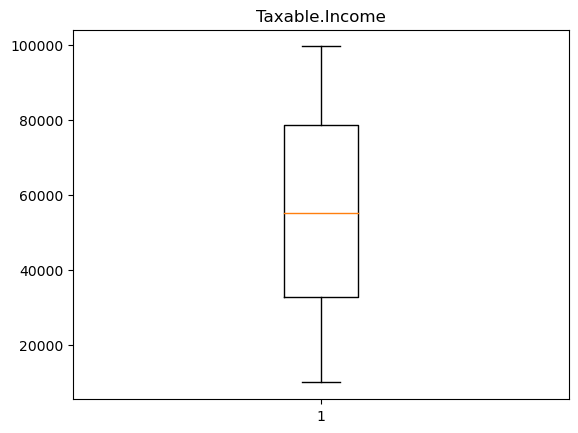

In [34]:
# PLOTING THE BOXPLOT FOR THE NUMERICAL COLUMNS
plt.boxplot(Fraud['Taxable.Income'])
plt.title('Taxable.Income')

Text(0.5, 1.0, 'City.Population')

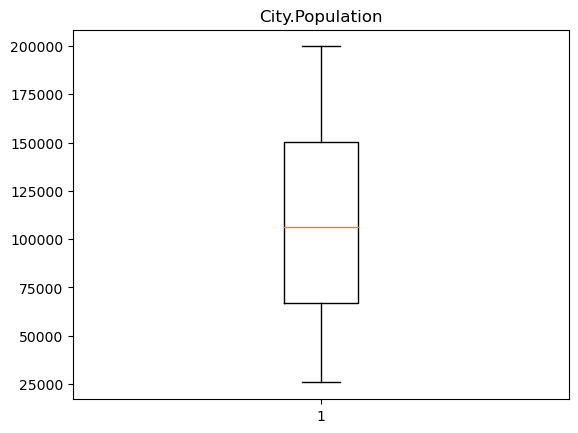

In [35]:
plt.boxplot(Fraud['City.Population'])
plt.title('City.Population')

Text(0.5, 1.0, 'Work.Experience')

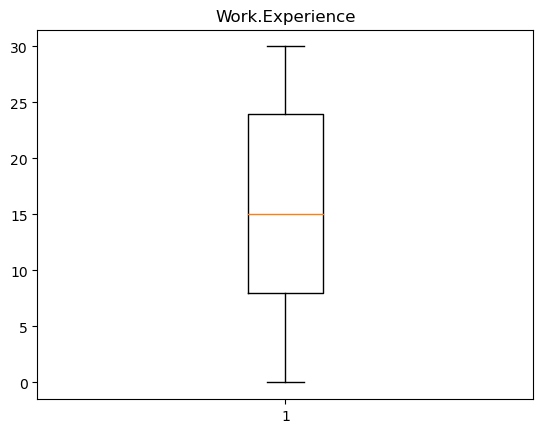

In [36]:
plt.boxplot(Fraud['Work.Experience'])
plt.title('Work.Experience')

# # making the categorical for the Taxable.Income column

In [37]:
Fraud['Taxable_Income_Category']='risky'
Fraud.loc[Fraud['Taxable.Income']>30000,'Taxable_Income_Category']='good'

In [38]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income_Category
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [39]:
Fraud_Data=Fraud.drop(['Taxable.Income'],axis=1)

In [40]:
Fraud_Data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income_Category
0,NO,Single,50047,10,YES,good
1,YES,Divorced,134075,18,YES,good
2,NO,Married,160205,30,YES,good
3,YES,Single,193264,15,YES,good
4,NO,Married,27533,28,NO,good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,good
596,YES,Divorced,55369,2,YES,good
597,NO,Divorced,154058,0,YES,good
598,YES,Married,180083,17,NO,good


## LABEL ENCODING

In [41]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()

In [42]:
Fraud_Data['Undergrad']=Encoder.fit_transform(Fraud_Data['Undergrad'])
Fraud_Data['Marital.Status']=Encoder.fit_transform(Fraud_Data['Marital.Status'])
Fraud_Data['Urban']=Encoder.fit_transform(Fraud_Data['Urban'])
Fraud_Data['Taxable_Income_Category']=Encoder.fit_transform(Fraud_Data['Taxable_Income_Category'])

In [43]:
Fraud_Data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income_Category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [44]:
Fraud_Data['Taxable_Income_Category'].value_counts()

0    476
1    124
Name: Taxable_Income_Category, dtype: int64

In [45]:
#SINCE THE DATA IS UNBALANCED SO UPSAMPLING TO MAKE DATA BALANCED
from sklearn.utils import resample
Fraud_data1=resample(Fraud_Data[Fraud_Data.Taxable_Income_Category==1],n_samples=len(Fraud_Data[Fraud_Data.Taxable_Income_Category==0]))

In [46]:
Fraud_data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income_Category
233,0,1,63701,19,1,1
106,1,2,58535,20,1,1
541,1,0,191874,30,1,1
379,0,2,112774,13,0,1
241,1,2,31377,18,1,1
...,...,...,...,...,...,...
458,1,2,110892,18,1,1
459,1,0,125407,21,0,1
329,0,2,39360,10,0,1
207,1,1,138108,28,0,1


In [47]:
Fraud_df=pd.concat([Fraud_Data[Fraud_Data.Taxable_Income_Category==0],Fraud_data1])

In [48]:
Fraud_df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income_Category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
458,1,2,110892,18,1,1
459,1,0,125407,21,0,1
329,0,2,39360,10,0,1
207,1,1,138108,28,0,1


In [49]:
#SPLITTING THE DATA 
X=Fraud_df.iloc[:,:-1]
Y=Fraud_df.iloc[:,-1]

In [50]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
458,1,2,110892,18,1
459,1,0,125407,21,0
329,0,2,39360,10,0
207,1,1,138108,28,0


In [51]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
458    1
459    1
329    1
207    1
367    1
Name: Taxable_Income_Category, Length: 952, dtype: int32

In [52]:
#MODEL BUILDING
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [53]:
num_trees=100
max_features=5
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features,criterion='entropy')
results=cross_val_score(model,X,Y,cv=kfold)

In [54]:
results

array([0.85416667, 0.91666667, 0.90526316, 0.90526316, 0.89473684,
       0.84210526, 0.85263158, 0.86315789, 0.88421053, 0.91578947])

In [55]:
print(results.mean())

0.8833991228070175
